In [1]:
#installs
# neatetx, pandas, spacy, numpy, seaborn, altair, streamlit, lime, eli5, sk

In [2]:
#text clssifier


In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
#for visualiations 
import seaborn as sns
#for textual cleaning
import neattext.functions as nfx

# ML packages 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# tranformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
#Load Datasets
df = pd.read_csv("data/emotion_dataset_2.csv")

In [6]:
df.head()


,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [7]:
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
5,5,fear,I'm expecting an extremely important phonecall...,Im expecting extremely important phonecall min...
6,6,sadness,.Couldnt wait to see them live. If missing th...,Couldnt wait live missing NH7 wasnt painful en...
7,7,surprise,maken Tip 2: Stop op een moment dat je het hel...,maken Tip 2: Stop op een moment dat je het hel...
8,8,surprise,En dan krijg je ff een cadeautje van een tweep...,En dan krijg je ff een cadeautje van een tweep...
9,9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...,Drummer Boy bij op verzoek van : welke ...


In [8]:
df.shape


(34792, 4)

In [9]:
#checking missing values
df.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

some Plots

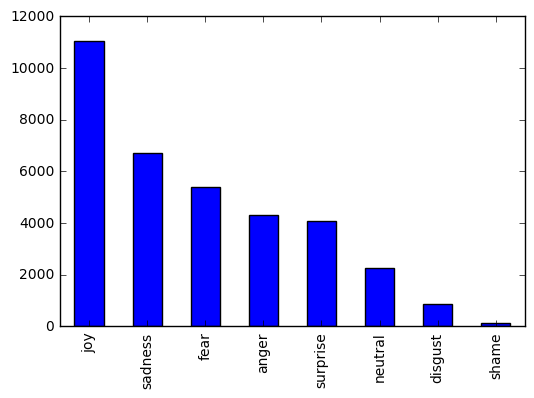

In [10]:
#count for the emotions
df['Emotion'].value_counts().plot(kind='bar')

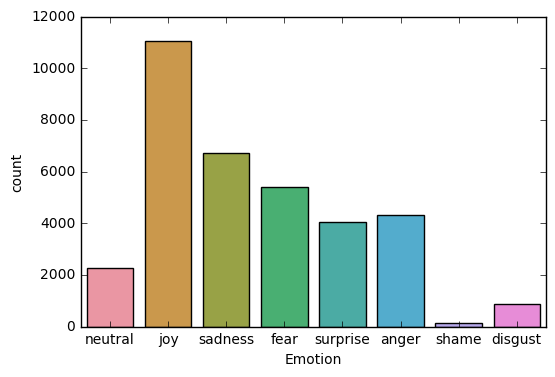

In [12]:
sns.countplot(x='Emotion', data=df)

### Exploration:
- Clean text
- Sentiment Analysis
- Keyword Extraction
        + keywords for each_emotion 
        + wordcloud

In [13]:
#Sentment analysis
from textblob import TextBlob

In [14]:
#create a blob from the text
# this blob will create a textBlob 
def sentiment_get(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity # only getting the polarity no the subject
    #create function to group them 
    if sentiment > 0:
        result = "positive "
    elif sentiment < 0:
        result = "negative"
    else:
        result = "neutral"
    return result 

In [15]:
#testing above sentiment function 
sentiment_get("i love art")

'positive '

In [16]:
df['Sentiment'] = df['Text'].apply(sentiment_get)

In [17]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text,Sentiment
0,0,neutral,Why ?,NaN,neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,neutral
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,negative
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,neutral


In [18]:
#Compare Emotion vs Sentiment
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     negative     1787
          neutral      1386
          positive     1124
disgust   negative      325
          neutral       249
          positive      282
fear      negative     1534
          neutral      1843
          positive     2033
joy       negative     1682
          neutral      3648
          positive     5715
neutral   negative      178
          neutral      1523
          positive      553
sadness   negative     2630
          neutral      2127
          positive     1965
shame     negative       46
          neutral        50
          positive       50
surprise  negative      623
          neutral      1545
          positive     1894
dtype: int64

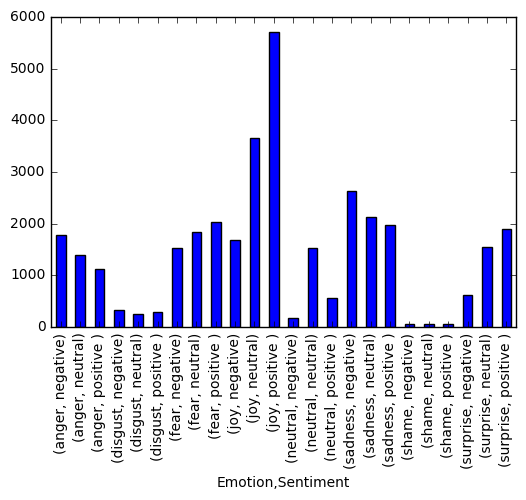

In [19]:
#plotting of sentiment dataframe
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

/Users/ezi/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:3672: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/ezi/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:3678: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


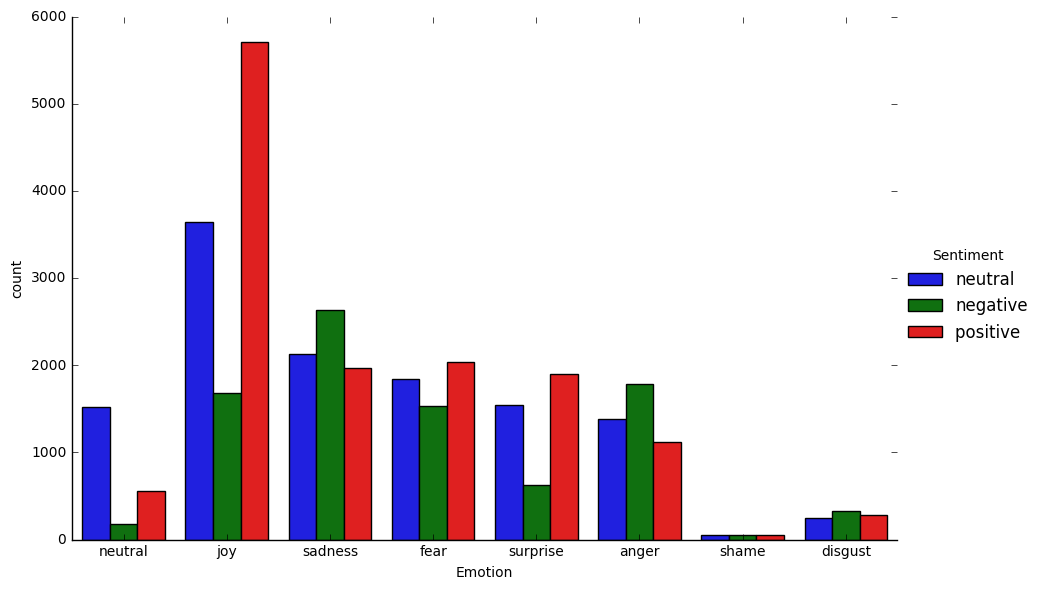

In [30]:

sns.factorplot(x='Emotion',hue='Sentiment',data=df,kind='count',size=6,aspect=1.5)

#### Data/Text Cleaning: remove noise 
- Stopwords
- Special Characters
- punctuations
- emojis

In [20]:
#neat test
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [21]:
sns.factorplot
sns.catplot


<function seaborn.categorical.catplot>

In [22]:
df['Text']
#theres speacial charcters, mentions with @ etc


0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
5        I'm expecting an extremely important phonecall...
6         .Couldnt wait to see them live. If missing th...
7        maken Tip 2: Stop op een moment dat je het hel...
8        En dan krijg je ff een cadeautje van een tweep...
9         @1116am Drummer Boy bij op verzoek van @BiemO...
10       The bull tossed the effigy out of their hands ...
11                 People hide their behind a #fake smile.
12       For once in his life , Leopold must have been ...
13       Against the assault of laughter nothing can st...
14        With everything , with everybody , with all t...
15       Shakuhachi dress $580,  10-22 mm lens $708 #pa...
16       Haha of course I come home to a different hous.

In [23]:
#remove @'s or handles
df['Clean_Text']= df['Text'].apply(nfx.remove_userhandles)

In [24]:
df['Clean_Text']= df['Clean_Text'].apply(nfx.remove_stopwords)

In [25]:
df['Clean_Text']= df['Clean_Text'].apply(nfx.remove_punctuations)

In [26]:
df[['Text','Clean_Text']] #to:do--> remove hash tags and "reallllllyyyy"

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e b...
5,I'm expecting an extremely important phonecall...,Im expecting extremely important phonecall min...
6,.Couldnt wait to see them live. If missing th...,Couldnt wait live missing NH7 wasnt painful en...
7,maken Tip 2: Stop op een moment dat je het hel...,maken Tip 2: Stop op een moment dat je het hel...
8,En dan krijg je ff een cadeautje van een tweep...,En dan krijg je ff een cadeautje van een tweep...
9,@1116am Drummer Boy bij op verzoek van @BiemO...,Drummer Boy bij op verzoek van : welke uitvoe...


#### Keyword Extraction

In [27]:
#extract the most common words per class of emotion
from collections import Counter 

In [46]:
#get the kewords
def extractKeyWords(text, number=50):
    #since the text cleaning has already happened we can work out the tokens
    tokens = [ tok for tok in text.split()]
    mostCommonToken = Counter(tokens).most_common(number)
    return dict(mostCommonToken)


In [33]:
# list all emotions 
emotionList = df['Emotion'].unique().tolist()

In [34]:
emotionList 

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [36]:
#get all the emotions
df[df['Emotion'] =='joy']['Clean_Text']

1                           Sage Act upgrade list tommorow
3        eye  true hazel eyeand brilliant  Regular feat...
4        ugh babe hugggzzz u  babe naamazed nga ako e b...
12       life  Leopold truly happy : hopes prayers belo...
17                         feeling fail french #fuckfrench
18                                               GoodLet  
21       fell love \X\ Overnight felt confidence selfes...
27                      terribly ecstatic dangerous thing 
29                               selected study university
30                                          Yeah  ’ ages  
35                           passed BA exams class results
47       heard selected fot year university Zambia form...
49                                    Welp time study days
50                         Heading campus rain grad photos
62                                        feeling awesome 
63       brings  Ive bought Christmas presents trawl lo...
70                              shit pants Pure 100% gra

In [37]:
#then combine into a list which can then be passed into the function 
joy_list = df[df['Emotion'] =='joy']['Clean_Text'].tolist()

In [38]:
#to get it as a token for joy
joy_document = ' '.join(joy_list)

In [40]:
# returns all the sentences aboev as a whole paragraph 
joy_document 

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness  ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome  brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming pap

In [47]:
#now extract the kewords
keyword_joy= extractKeyWords(joy_document)

In [48]:
#check for keywords for joy (top 50)
keyword_joy

{'2': 262,
 ':)': 311,
 'Christmas': 453,
 'God': 177,
 'Im': 555,
 'RT': 159,
 'amp': 678,
 'cant': 165,
 'class': 141,
 'day': 729,
 'days': 208,
 'excited': 145,
 'family': 181,
 'feel': 227,
 'feeling': 159,
 'felt': 167,
 'friend': 169,
 'friends': 155,
 'going': 304,
 'good': 345,
 'got': 328,
 'great': 194,
 'happy': 368,
 'home': 302,
 'hour': 172,
 'hours': 251,
 'it': 162,
 'joy': 257,
 'know': 177,
 'life': 251,
 'like': 476,
 'long': 204,
 'love': 393,
 'me': 196,
 'morning': 288,
 'new': 181,
 'night': 332,
 'people': 201,
 'right': 142,
 's': 180,
 'school': 297,
 'sleep': 185,
 'think': 148,
 'time': 602,
 'today': 471,
 'tomorrow': 467,
 'tonight': 205,
 'week': 231,
 'work': 509,
 'year': 225}

In [76]:
#helper plot function
#takes a dictionary
def plot_most_common_words(mydict, emotion_name):
    #dataframe takes the keywords
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("plot of {}, most common key words".format(emotion_name))
    sns.barplot(x='token', y='count',data = df_01)
    plt.xticks(rotation=45)
    plt.show()

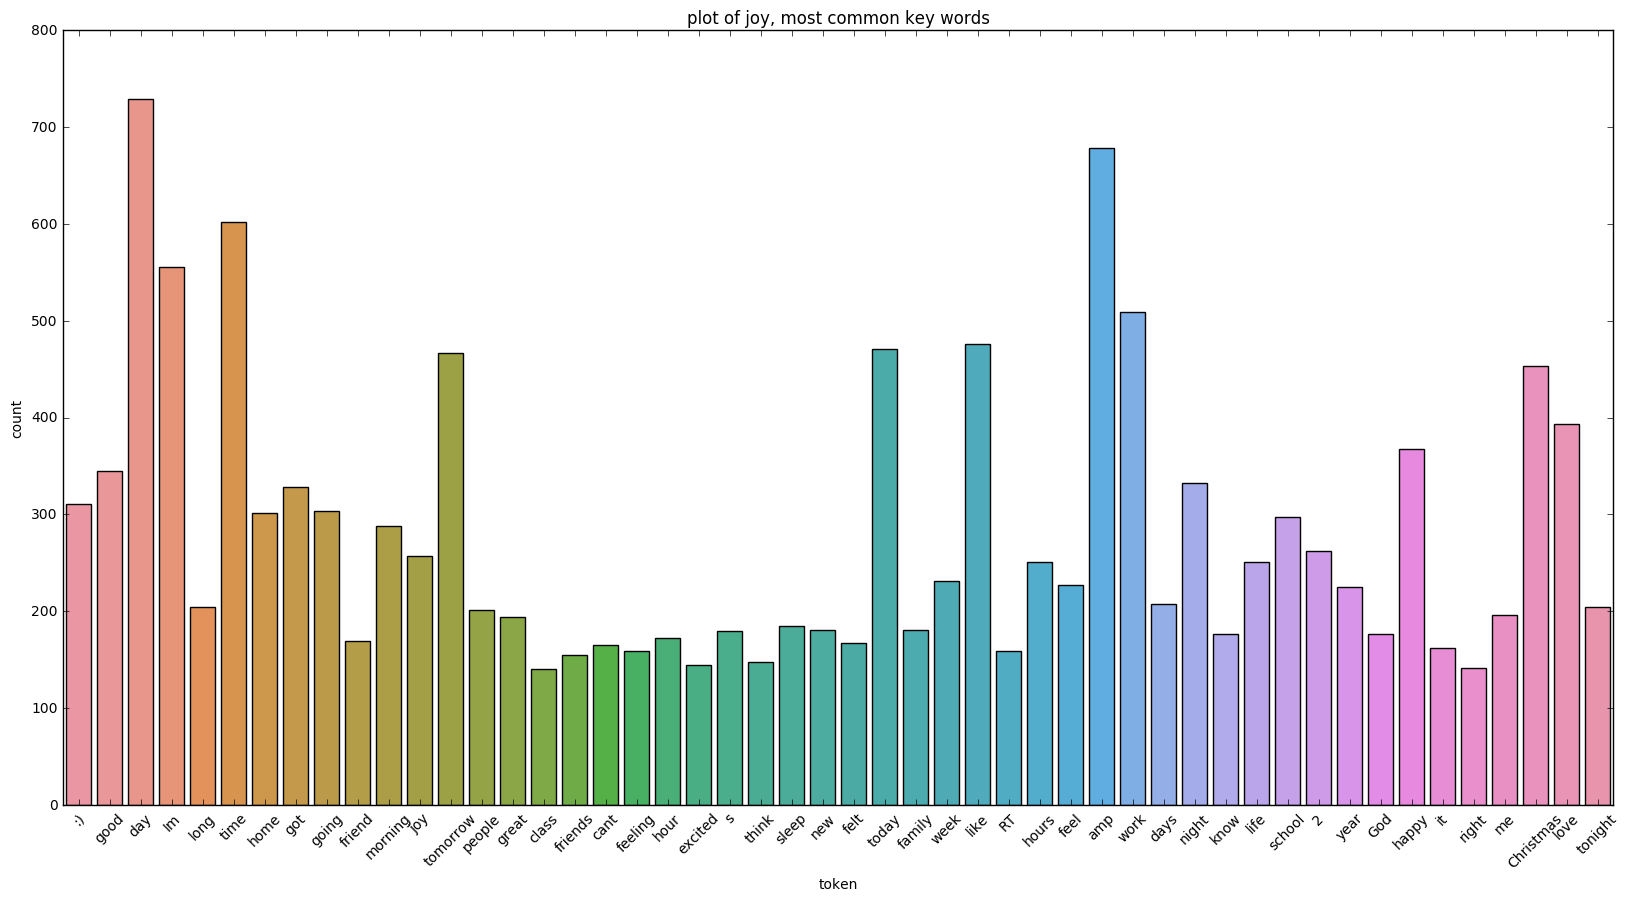

In [77]:
plot_most_common_words(keyword_joy, "joy")

In [71]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
#document 
surprise_document = ' '.join(surprise_list)
#Extract Keywords
keyword_surprise = extractKeyWords(surprise_document)

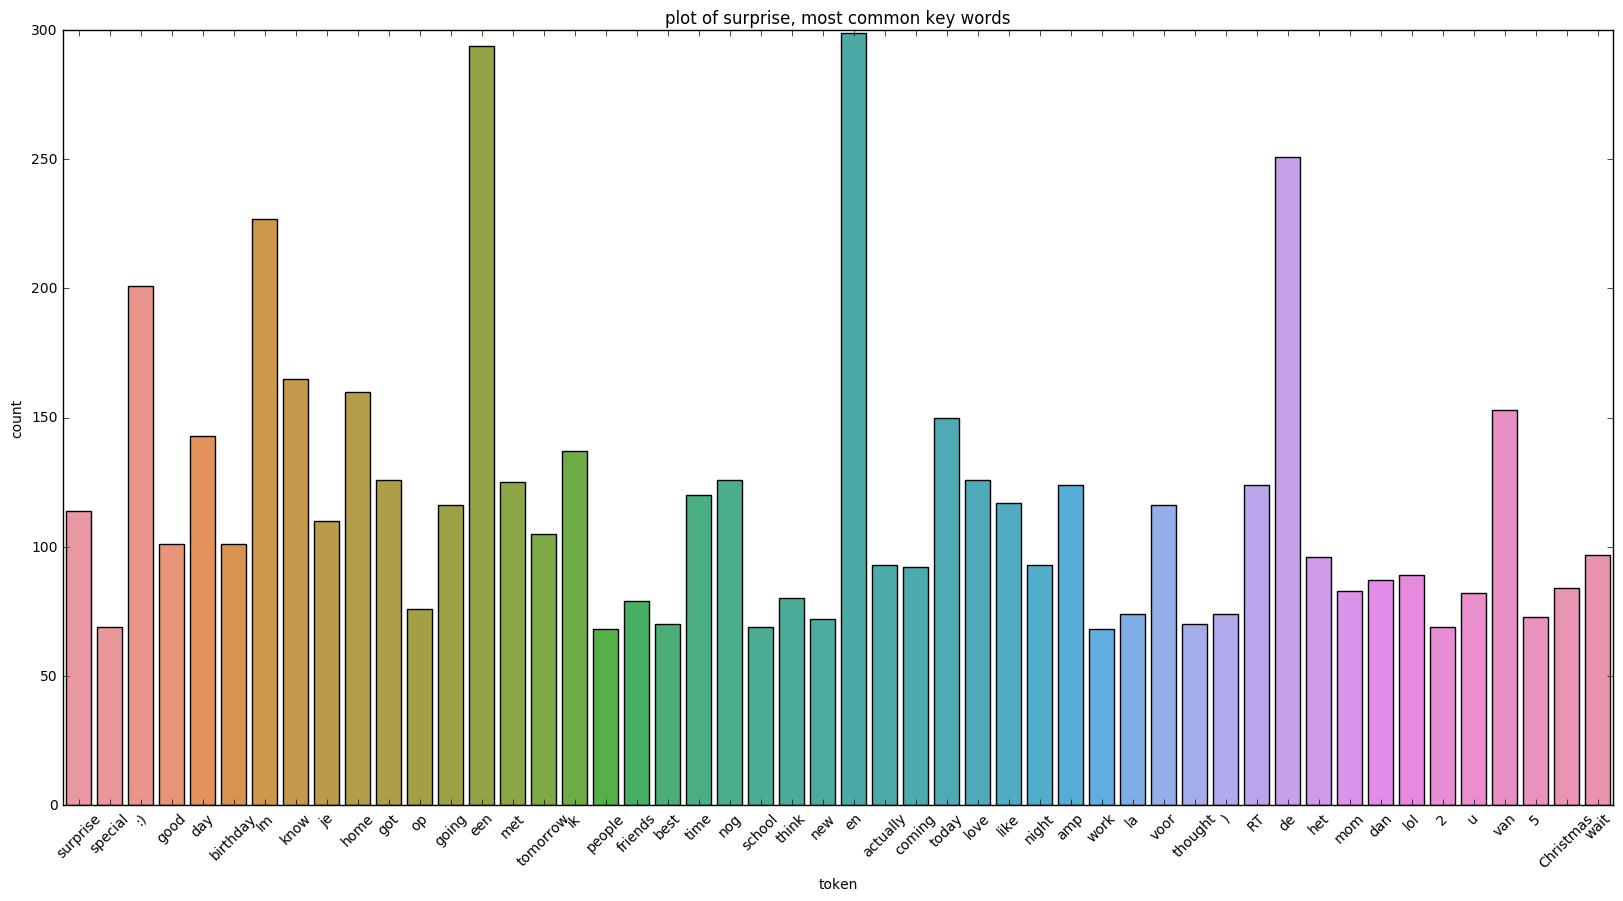

In [78]:
plot_most_common_words(keyword_surprise, "surprise")

In [79]:
### Word Cloud:
from wordcloud import WordCloud

ImportError: No module named 'wordcloud'